# Music Genres Over Time

## What genres have been most popular in the US over the years?

### A computational essay by Aaron Huang and Antoinette Tan, students at Olin College of Engineering.

Whenever you start or restart your notebook, run the following code cell to make sure that this notebook pulls in the latest version of your code:

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Introduction


Music is something we’ve all experienced before whether it is in a shopping mall, on the car radio, or in spotify playlists. That being said, we all listen to different kinds of music and have different tastes in genre. Like shifts in societial views throughout the decades, music tastes changes to reflect that. Answering this question can provide some insight into what the culture was like back then. In this project, we attempted to answer the question: How have popular music genres changed over time in the United States? In order to answer this question we found the top songs in the United States from 1946 to 2020, found the genres associated with these songs, and visualized this data in three different ways. In doing this we were able to find the genres that have been most prevalent over the years, as well as genres that have come and go.

# Methodology

## Obtaining the Top Songs Over the Years

In order to find what genres have been popular over the years, we first looked at what songs have been popular. To do this, we scraped data from the top songs from the [billboard year end hot 100](https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2019) wikipedias for the years 1946 to 2020. All of the articles we used are linked in the last table on the wikipedia page linked. The range of years was chosen based on the billboard hot 100 data available to us.

According to the [Billboard Year-End wikipedia page](https://en.wikipedia.org/wiki/Billboard_Year-End) (usually not the most reliable source, but is the main source for this project!), Billboard year-end charts are a cumulative measure of a single or album’s performance in the United States, based upon the Billboard magazine charts during any given chart year. Before 1991, the year-end charts were calculated on an inverse-point system based solely on a title’s performance. A single appearing on the Billboard hot 100 would be given one point for a week spent at position 100 or 100 points for a week spent at position one. Other factors included the total weeks a song spent on the chart and its peak position were calculated into the year-end total.

After 1991, Billboard began incorporating sales and airplay information and the year end charts are now calculated by a straightforward cumulative total of yearlong sales (or sales and airplay) points.

An example list of some of the wikipedia titles we used can be seen below.

In [4]:
import wikipedia

# Gets information from the 1950 wikipedia page
top_songs1950 = wikipedia.page("Billboard year-end top 30 singles of 1950")
# Gets a list of all the names of the articles for hot singles for each year, as these are listed
# as links at the bottom of the 1950 page
top_per_year_wikis = top_songs1950.links[9:83]
# Print out an example list of 10 of the wikipedia titles
print(top_per_year_wikis[60:70])



['Billboard Year-End Hot 100 singles of 2019', 'Billboard Year-End Hot 100 singles of 2020', 'Billboard year-end top 30 singles of 1949', 'Billboard year-end top 30 singles of 1951', 'Billboard year-end top 30 singles of 1952', 'Billboard year-end top 30 singles of 1953', 'Billboard year-end top 30 singles of 1954', 'Billboard year-end top 30 singles of 1955', 'Billboard year-end top 50 singles of 1956', 'Billboard year-end top 50 singles of 1957']


From these wikipedia pages we got the title of the top songs per year as well as the name of the artist(s). As seen in the title of the pages, not all of the charts were actually top 100, some of them were top 50, or top 30, or some number inbetween. Therefore, we had to normalize our data to 100, to make sure that all years were weighted equally. We will discuss this more in detail in the data processing section.

## Obtaining the Top Genres Over the Years

After getting the top songs for each year, we needed to find the genre(s) associated with each song. To do this, we used the [discogs API](https://www.discogs.com/developers). The genres in Discogs are based on how releases are tagged by contributors. Genres are inherently subjective as it is hard to accurately describe a piece of music. So, although the nature of how genre's are classified in discogs may be inconsistent,  we believed that this was reliable enough for our purposes as there are no objective standards for genre in general. The umbrella classifications of genres on the discogs database were decided by the discogs contributors when the database launched in 2000. To give an understanding of the definition of the genres, below are the possible genre classifications and their associated styles according to the [discog blog](https://blog.discogs.com/en/genres-and-styles/).


**Brass & Military**: Brass Bands, Marches, Military, Pipe and Drum

**Blues**: Boogie Woogie, Chicago Blues, Electric Blues, Piano Blues, etc

**Children’s**: Educational, Nursery Rhymes, Story

**Classical**: Baroque, Choral, Contemporary, Early, Impressionist, Modern, Opera, etc.

**Electronic**: Chillwave, Dance-pop, Deep Techno, Disco, Electro Swing, Grime, Techno

**Folk, World and Country**: Aboriginal, Bhangra, Bluegrass, Chinese Classical, Nordic, etc.

**Funk and Soul**: Boogie, Funk, Gospel, Rhythm and Blues, Soul, etc.

**Hip Hop**: Bass Music, Beat Box, Jazzy Hip-Hop, Pop Rap, RnB/Swing, Trap, etc

**Jazz**: Afrobeat, Bop, Avant-garde Jazz, Contemporary Jazz, Fusion, Ragtime, etc.

**Latin**: Afro-Cuban, Bachata, Cha-Cha, Mariachi, Tango, etc.

**Non-Music**: Audiobook, Comedy, Education, Poetry, Sermon, etc.

**Pop**: Ballad, Barbershop, Bollywood, City Pop, Indie Pop, K-pop, etc.

**Reggae**: Azonto, Calypso, Mento, etc.

**Rock**: Acoustic, Alternative Rock, Classic Rock, Deathcore, Grunge, Heavy Metal, Rock&Roll, Punk,  etc.

**Stage and Screen**: Caraberet, Musical, Score, Soundtrack, Video Game Music, etc.

Although the genre categories are very broad, they fit our purposes very well in giving us a broad overview of the genres over time. Songs that had multiple genres listed we counted as two different genres. The reason for this being that are project is not seeking the genres of the top songs, but rather using the top songs as a means for telling us the landscape of the genres over time. In addition, some songs returned a genre of None, which is another reason why we had to normalize each year (again we will talk more about this in the 'Processing the Data' section.

## Storing the Data

One we got the genres, we got rid of the titles and artists of the songs and stored the year and genres of the top songs in that year in a csv. Below is a dataframe that is an example of what data was stored in the csv.

In [5]:
import pandas as pd


csv_dataframe = pd.read_csv ('genre_year_data.csv')
print(csv_dataframe)

                           Genre  Year
0      ['Pop', 'Stage & Screen']  1960
1     ['Folk, World, & Country']  1960
2                ['Rock', 'Pop']  1960
3                       ['Rock']  1960
4                        ['Pop']  1960
...                          ...   ...
6684                     ['Pop']  1950
6685                     ['Pop']  1950
6686                    ['Jazz']  1950
6687                     ['Pop']  1950
6688             ['Rock', 'Pop']  1950

[6689 rows x 2 columns]


## Processing the Data

To process our data we read our data in from the csv file, and counted up how many songs were in each genre for each year. For each song, all of the genres listed counted as one count for that genre category for that year. For example, if the song, "example song", was a top song in 1990 and had the genres pop and rock listed, that would be one count for pop in 1990 and one count for rock in 1990. Then, for each year we normalized the data so that every year would have a total of 100 when all genres were added up. We did this because not all of the wikipedia pages had the same amount of songs, some songs had more than one genre associated with it, and some songs returned a genre of none. Therefore, if we did not normalize our data, some years would be weighted far more heavily than other years that don't have as many total genre counts. We chose the number 100 since most of the wikipedia articles we scraped from were "billboard hot 100." 

To normalize each year's total genre counts to 100 we first found the total amount of genre counts for that year.

In [6]:
from count_genres_per_year import count_genres_per_year

#get's a dictionary with the total genre counts for each year
count_genres_dict = count_genres_per_year('genre_year_data.csv', 1946, 2020)
#get's a dictionary for one of the years (1946)
example_dict = dict(list(count_genres_dict.items())[0:1])
print(example_dict)
#get's the total genre coutns for that year (1946)
total_genre_count = total_songs = sum(example_dict[1946].copy().values(), 0.0)
print(f'The sum of the genre counts for this year is {total_genre_count}')

{1946: {'Pop': 31, 'Jazz': 17, 'Stage & Screen': 3, 'Folk World & Country': 2, 'Funk / Soul': 1, 'Rock': 1, 'Reggae': 1}}
The sum of the genre counts for this year is 56.0


We then divided each genre category's counts by the total genre count for that year and multiplied by 100. As seen in the code below, this allowed all of our years to have genre counts that totaled to 100.

In [24]:
normalized_dict = {}
normalized_dict[1946] = {genre: number *100/ total_genre_count for genre, number in example_dict[1946].items()}
print(normalized_dict)

print(f'The sum of all the genre counts for this year is {round(sum(normalized_dict[1946].values()))}!')

{1946: {'Pop': 55.357142857142854, 'Jazz': 30.357142857142858, 'Stage & Screen': 5.357142857142857, 'Folk World & Country': 3.5714285714285716, 'Funk / Soul': 1.7857142857142858, 'Rock': 1.7857142857142858, 'Reggae': 1.7857142857142858}}
The sum of all the genre counts for this year is 100!


The disadvantage of normalizing our data to 100 is that some years have a lower resolution than others. However, it should still give us a clear picture of the genre trends over time.

We then put all of these dictionaries for the genres of each year into another dictionary with the year as the key. An example of the dictionary from 1946 to 1947 can be seen below. 

In [7]:
from count_genres_per_year import count_genres_per_year_normalized

# Get's the normalized genre data from 1946 to 2020
count_genres_dict_normalized = count_genres_per_year_normalized('genre_year_data.csv', 1946, 2020)
# Takes only the first two entries of the dictionary to use as an example
example_dict = dict(list(count_genres_dict_normalized.items())[0:2])
print(example_dict)

{1946: {'Pop': 55.357142857142854, 'Jazz': 30.357142857142858, 'Stage & Screen': 5.357142857142857, 'Folk World & Country': 3.5714285714285716, 'Funk / Soul': 1.7857142857142858, 'Rock': 1.7857142857142858, 'Reggae': 1.7857142857142858}, 1947: {'Jazz': 36.92307692307692, 'Blues': 3.076923076923077, 'Classical': 1.5384615384615385, 'Folk World & Country': 6.153846153846154, 'Stage & Screen': 3.076923076923077, 'Pop': 46.15384615384615, 'Non-Music': 3.076923076923077}}


For some of our visualizations we needed a cumulative total for each year's genres. For example, if 1946 has 55 counts under pop, and 1947 has 46 count under pop, the cumulative total for 1947 would be 101 pop songs. An example of this is shown below.

In [8]:
from count_genres_per_year import accumulative_genre

# Get's the accumulative genre counts from 1946 to 2020
accumulative_genre_dict = accumulative_genre('genre_year_data.csv', 1946, 2020)
# Takes only the first two entries of the dictionary to use as an example
example_cumulative = dict(list(accumulative_genre_dict.items())[0:2])
print(example_cumulative)


{1946: {'Pop': 55.357142857142854, 'Jazz': 30.357142857142858, 'Stage & Screen': 5.357142857142857, 'Folk World & Country': 3.5714285714285716, 'Funk / Soul': 1.7857142857142858, 'Rock': 1.7857142857142858, 'Reggae': 1.7857142857142858}, 1947: {'Pop': 101.51098901098901, 'Jazz': 67.28021978021978, 'Stage & Screen': 8.434065934065934, 'Folk World & Country': 9.725274725274726, 'Funk / Soul': 1.7857142857142858, 'Rock': 1.7857142857142858, 'Reggae': 1.7857142857142858, 'Blues': 3.076923076923077, 'Classical': 1.5384615384615385, 'Non-Music': 3.076923076923077}}


Now that we had all the genre counts for each year, we would be able to tell how genre has changed over time.

# Results

To summarize our data we made three different visualizations. Pie charts for each generation from Baby Boomers to Gen Alpha, an area chart for the decades from 1950 to 2020, and a bar chart race animation from 1946 to 2020.

## Pie Charts

For this visualization, we plotted pie charts for different generations to see what music each generation grew up on. The definitions of the generations are based on when they are born and are as follows:

* **(Baby) Boomers**- 1946 to 1964
* **Gen X**- 1965 to 1980
* **Millenials**- 1981-1996
* **Gen Z**- 1997-2015
* **Gen Alpha**- 2016- present

Before making the pie charts, we got rid of any genres that made up less than 5% of the total genre count for each year as to make the charts less overwhelming.

### Baby Boomers

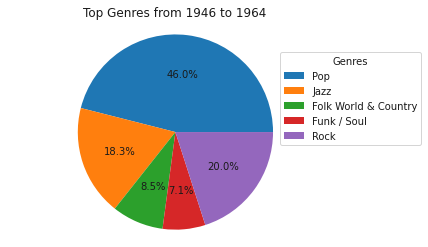

In [9]:
# This tells Python to show the plots inside this notebook
%matplotlib inline
from visualizations import create_pichart

create_pichart(1946, 1964)

Something to note in this chart is that it is the only one of the pie charts for the generation's that has Jazz and Folk World & Country.

### Gen X

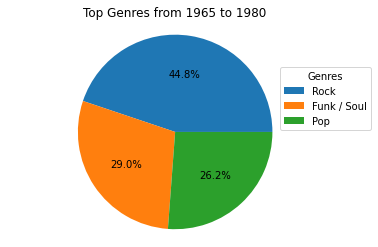

In [7]:
create_pichart(1965, 1980)

For Gen X, we can see that Rock music and Funk/Soul were some of the main genres as they both make up more than a quarter of the pie chart.

### Millenials

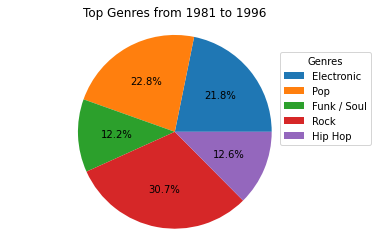

In [8]:
create_pichart(1981, 1996)


For Millenials there starts to be a lot of different types of music genres that are popular. Rock is still the most prevelent genre, while new genres like Electronic and Hip Hop start to show up.

### Gen Z


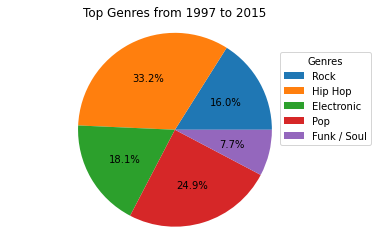

In [9]:
create_pichart(1997, 2015)


For Gen-Z we can see that Hip Hop has taken over the spot of top genre for this generation, while Funk/Soul has become less popular. We also start to see the decline in popularity of rock,  as it starts to make up less than 20% of the pie.

### Gen Alpha 

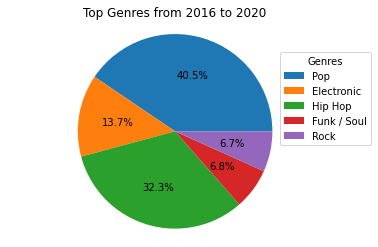

In [10]:
create_pichart(2016, 2020)


This generation only has 5 years of data available so far, but we can see that the music they have grown up on so far closely matches the genres for Gen Z, except pop is even more prevelent for this generation.

From all of these pie charts we can see that pop always made up at least 20% of each pie, showing its constant popularity for each generation. We can also see that starting with millenials, music taste starts to become more diverse as more genres take up larger portions of the pies.

## Area Chart

For this visualization, we constructed an area chart for top genres by the decades from 1950 to 2020. An area chart is essentially a line graph with the area below shaded in. For our graph, we plotted only every 10 years as a means of seeing the general trends for each genre over the years.

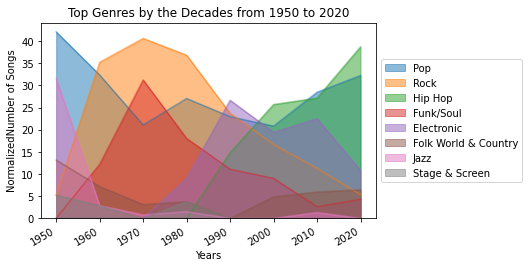

In [11]:
from visualizations import area_chart_decades

area_chart_decades()

This chart allows us to see the trend of each genre. One thing we can see here is that a lot of genres have come and go. For example we can see that Rock and Funk/Soul peaked in 1970 then declined, we can see Electronic music being popular from 1990 to 2010, and we can see the recent rise of Hip Hop. Once again, in this chart we can see that Pop has always been consistently popular. It is cool to see how Rock and Soul both peaked in 1970 as a result of the cultural shifts of the Civil Rights Movement and the Vietnam War protests.

### Bar Chart Race

For this visualization, we made a bar chart race for the top genres from 1946 to 2020. This animation gives us insight into the ranked popularity of each genre for each year, and allows us to see how popular genres have changed over time in relation to eachother. Note that the numbers used in the bar chart race are the number of cumulative genre counts for each genre as described in the section "Processing the Data." 

In [ ]:
from IPython.display import HTML
from visualizations import create_bar_chart_race
%matplotlib inline
# Get's the HTML string for the bar chart race animation
# The bar plot race inner workings creates a warning, but it can be ignored
# The warning is there incase someone zooms in and the labels end up on the wrong ticks
video_html = create_bar_chart_race()

#embeds video into jupyter notebook
HTML("""
<video width="840" height="460" controls="">
<source src="{0}">
</video>
""".format(video_html))




/home/softdes/anaconda3/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/home/softdes/anaconda3/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


From this bar chart we can see that pop has always been one of the top ranking genres throughout all of the years. Some things to note is the increasing popularity of Jazz relative to Pop until around year 1950, when Pop starts to increase at a much faster rate. Around 1950, we can also start to see Rock steadily climbing the ranks as it increases in popularity at faster rates than the other genres. At 1970 we can see Funk/Soul also taking over the ranks to eventually reach the third spot. Then around, 2007 we can see Rock and Funk/Soul both lose their popularity as other genres start increasing their ranks. At around 1976 we also see the Electronic genre seemingly come out of nowhere as it takes over  other genres such as Blues, Stage & Screen, and Folk World & Country. Then around 1990, Hip Hop also starts taking over and eventually ends up in the 3rd spot for top genres.

# Conclusion

## Key Insights

Through our three different visualizations, we've used three different lenses to view how the popularity of different genres in the United States has changed over time. With the pie charts we were able to see the different genres that different generations grew up on. Although some genres completely changed in popularity such as Folks World & Country, Electronic, and Hip Hop, we can see that all the generations grew up on at least Funk/Soul and Pop music. With the area chart we were able to see the different trends for each genre. Jazz and Folk World & Country peaked earlier on, Funk/Soul and Rock peaked in 1970, Electronic peaked from 1990 to 2010, Hip Hop seems to be in its peak now, while it seems like Pop has always been popular (as its name suggests). Lastly, from the bar chart race we were able to see the trends of genres over time compared to each other.  As indicated by our other visiualizations, Pop has always been a strong force in terms of its popularity. From this animation we can also see how a lot of small genres came and went such as Latin, Blues, Reggae, and Classical.

Overall, we notice that even though a lot of genres come and go in popularity, pop music will always be popular (as the name suggests). Some other key takeaways from these visualizations are that no genre was consistently number one in each year's ranking, and that the popular genre's over the years have become more diverse over time.

## Contextual Implications

Music is not purely a reflection of what people like to listen to, but is also a reflection of culture. In this [article](http://www.thepeoplehistory.com/music.html) we can see how the world's events affected music. For example, many racial tensions due to the civil rights movement were expressed through Rythym and Blues and Rock 'n' Roll. This can be seen in our area chart with the rise of Rock and Funk/Soul starting from the 1950s-1960s. We can also see starting with the 1970s-1980s the rise of Electronic music as the computer age began.

## What We Learned

From this project we learned data scraping. More specifically, we learned how to use and integrate different website's APIs and how to download tools/libraries to help us more easily navigate the APIs. We also learned the annoying lesson that sometimes websites have rate limits in how much you can perform pull requests in a certain time frame. From this we found that our working ahead was well worth it, as it gave us time to mitigate these time costly set backs. We also learned a lot about plotting using matplotlib and how to write unit tests.

## Challenges

While doing this project, we faced some difficult challenges. As mentioned earlier, having to add a delay to our pull requests was quite frustrating, as it caused our code to take about 8 hours to obtain all the data we needed. Another challenge was figuring out the way to store our data. There were a lot of different possibilities in terms of where to store it as we initially obtained it, as we stored it, and as we processed it for our visualizations.

## Extending the Project
To extend our project, we would first try to validate our results. This could be done through qualitative research on music in the United States, and seeing if other people have done similar projects. We could also extend it by finding more specific genres, as the genres we used from discogs were very broad in their definitions. Lastly, we could possibly try to find a quantitative way of describing music styles, rather than just the genres. This would eliminate the rather subjective process of finding the genres of songs. 
